In [10]:
import io
import numpy as np

from torch import nn
import torch.utils.model_zoo as model_zoo
import torch.onnx


In [13]:
# PyTorch에서 구현된 초해상도 모델
import torch.nn as nn
import torch.nn.init as init


class SuperResolutionNet(nn.Module):
    def __init__(self, upscale_factor, inplace=False):
        super(SuperResolutionNet, self).__init__()

        self.relu = nn.ReLU(inplace=inplace)
        self.conv1 = nn.Conv2d(1, 64, (5, 5), (1, 1), (2, 2))
        self.conv2 = nn.Conv2d(64, 64, (3, 3), (1, 1), (1, 1))
        self.conv3 = nn.Conv2d(64, 32, (3, 3), (1, 1), (1, 1))
        self.conv4 = nn.Conv2d(32, upscale_factor ** 2, (3, 3), (1, 1), (1, 1))
        self.pixel_shuffle = nn.PixelShuffle(upscale_factor)

        self._initialize_weights()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.pixel_shuffle(self.conv4(x))
        return x

    def _initialize_weights(self):
        init.orthogonal_(self.conv1.weight, init.calculate_gain('relu'))
        init.orthogonal_(self.conv2.weight, init.calculate_gain('relu'))
        init.orthogonal_(self.conv3.weight, init.calculate_gain('relu'))
        init.orthogonal_(self.conv4.weight)

# 위에서 정의된 모델을 사용하여 초해상도 모델 생성
torch_model = SuperResolutionNet(upscale_factor=3)

In [1]:
# YOLOv5 코드 다운로드
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

# 필요한 패키지 설치
!pip install -r requirements.txt


fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
print(tf.__version__)


2.15.0


In [1]:
import pathlib
import subprocess

import os

# Roboflow 데이터셋 다운로드 명령어
dataset_url = "https://universe.roboflow.com/ds/LovJ3IqcN7?key=vz2BcnKzF2"

download_command = f'curl -L "{dataset_url}" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip'

# 현재 작업 디렉토리 변경
os.chdir("/content/")

# 다운로드 명령어 실행
subprocess.run(download_command, shell=True)

# 압축 해제된 데이터셋 디렉토리 경로
data_dir = pathlib.Path("/content/dataset")

In [ ]:
import subprocess
import pathlib

# 데이터 다운로드 및 압축 해제 명령어
kick_command = 'curl -L "https://universe.roboflow.com/ds/LovJ3IqcN7?key=vz2BcnKzF2" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip'

# 터미널 명령어 실행
subprocess.run(kick_command, shell=True)

# 데이터셋이 저장된 디렉토리 경로
kick_dir = pathlib.Path("/content")

# 각 하위 디렉토리에서 .jpg 확장자를 가진 이미지 파일의 수를 세는 코드
image_count_train = len(list(kick_dir.glob('train/images/*.jpg')))
image_count_test = len(list(kick_dir.glob('test/images/*.jpg')))
image_count_valid = len(list(kick_dir.glob('valid/images/*.jpg')))

print("Train 이미지 수:", image_count_train)
print("Test 이미지 수:", image_count_test)
print("Validation 이미지 수:", image_count_valid)

Train 이미지 수: 3447
Test 이미지 수: 0
Validation 이미지 수: 751


In [ ]:
import tensorflow as tf
print("Tensorflow version:",tf.__version__)
print(help(tf.lite.TFLiteConverter))

Tensorflow version: 2.15.0
Help on class TFLiteConverterV2 in module tensorflow.lite.python.lite:

class TFLiteConverterV2(TFLiteFrozenGraphConverterV2)
 |  TFLiteConverterV2(funcs, trackable_obj=None)
 |  
 |  Converts a TensorFlow model into TensorFlow Lite model.
 |  
 |  Attributes:
 |    optimizations: Experimental flag, subject to change. Set of optimizations to
 |      apply. e.g {tf.lite.Optimize.DEFAULT}. (default None, must be None or a
 |      set of values of type `tf.lite.Optimize`)
 |    representative_dataset: A generator function used for integer quantization
 |      where each generated sample has the same order, type and shape as the
 |      inputs to the model. Usually, this is a small subset of a few hundred
 |      samples randomly chosen, in no particular order, from the training or
 |      evaluation dataset. This is an optional attribute, but required for full
 |      integer quantization, i.e, if `tf.int8` is the only supported type in
 |      `target_spec.supp

In [ ]:
import tensorflow as tf
from tensorflow import keras
inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

11490434/11490434 [==============================] - 0s 0us/step


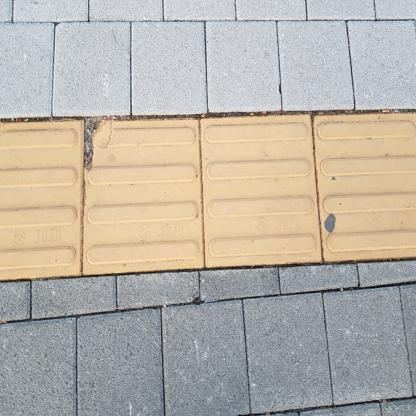

In [ ]:
from PIL import Image
import pathlib

# 데이터셋이 저장된 디렉토리 경로
data_dir = pathlib.Path("/content/")

# train/images 디렉토리 경로
train_images_dir = data_dir / "train" / "images"
valid_images_dir = data_dir / "valid" / "images"
test_images_dir = data_dir / "test" / "images"
# train/images 디렉토리 안에 있는 이미지 파일들의 경로 가져오기
train_image_paths = list(train_images_dir.glob("*.jpg"))
PIL.Image.open(str(train_image_paths[1]))
train_image_paths = list(valid_images_dir.glob("*.jpg"))
PIL.Image.open(str(train_image_paths[1]))




In [ ]:
img_height = 224
img_width = 224

# 배치 크기
batch_size = 128

# 데이터셋 생성
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    #데이터셋이 저장된 디렉토리 경로를 의미함
    validation_split=0.2,
    #검증 데이터셋으로 사용할 비율을 지정함  -> 20가 검증 데이터 셋으로 사영된다
    subset="training",
    #데이터셋의 하위 집합을 지정한다 "training" 을 지정하면 전체 데이터셋 중에서
    #훈련  데이터셋을 선택하고 "validation" 을 지정하면 검증 데이터셋을 선택함
    seed=123,
    #데이터를 분할할때 사용하는 seed 값으로 동일한 시드 값을 사용하면 매번 동일한 데이터 분할
    #결과를 얻을 수  있음
    image_size=(img_height, img_width),
    #모델의 입력으로 제공될 이미지 크기를 지정한다. 이 매개변수는 튜플(높이, 너비) 형태로 지정
    batch_size=batch_size)
    #모델에 한 번에 제공되는 이미지 배치의 크기임
    #한번에 처리되는 이미지 개수를 말함

Found 4198 files belonging to 3 classes.
Using 3359 files for training.


In [ ]:
data_dir = pathlib.Path("/content/valid")
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 751 files belonging to 2 classes.
Using 150 files for validation.


In [ ]:
class_names = ['sample_data', 'test', 'train', 'valid']
print(class_names)
#데이터세트의 class names 속성에서 클래스 이름을 찾을 수 있습니다
# 이들 클래스 이름은 알파벳 순서의 디렉토리 이름에 해당된다

['sample_data', 'test', 'train', 'valid']


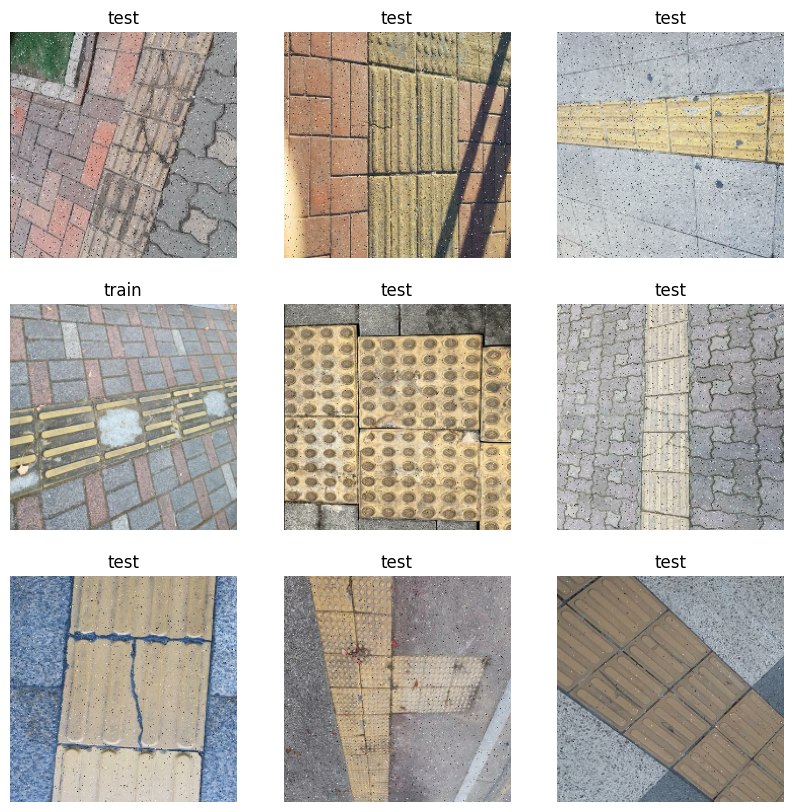

In [ ]:
import matplotlib.pyplot as plt
#matplotliv라이브러리를 임포트 한다는 말

plt.figure(figsize=(10, 10)) #새로운 플롯을 생성한다 크기를 (10,10) 으로 지정함
for images, labels in train_ds.take(1): #훈련 데이터셋에서 첫번째 배치를 가져옴 take(1)은 첫번째 배치만 가져온다
  for i in range(9):# 배치에서 처음부터 9개의 이미지를 반복적으로 가져온다
    ax = plt.subplot(3, 3, i + 1) #3x3 그리드에 이미지를 배치하기 위한 서브플롯을 생성한다
    plt.imshow(images[i].numpy().astype("uint8")) # 혀재 이미지를 시각화 한다 .numpy()를 사용하여 tensorfkow를 넘파이 배열로 변환 하고 이미지를 정수형으로 변환
    plt.title(class_names[labels[i]])# 현재 이미지의 라벨을 제목으로 설정한다
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(128, 224, 224, 3)
(128,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
#정규화 과정
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:

num_classes = len(class_names)
img_height = 224
img_width = 224

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  #이미지 픽셀값을 0에서 255 범위에서 0부터 1까지 조정한다  -> 저치리 과정
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  #Con2D : 2차원 컨볼루션 레이어를 정의함. 이미지의 지역적인 패턴을 감지하기 위해 컨볼루션 연산
  layers.MaxPooling2D(),
  #MaxPooling2D(): 최대 풀링 레이어를 정의함. 이미지의 공간 차원을 중리고 계산량을 감소시킴
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  #다차원 특성 맵을 1차원 벡터로 변환-> 컨볼루션 레이어와 완전 연결 레이어 사이에서 데이터 형식을 변환하는 역활
  layers.Dense(128, activation='relu'),
  #Dense : 완전 연결 레이어를 정의합. 모든 입력 뉴런이 이전 레이어의 모든 출력 뉴련과 연결됨
  layers.Dense(num_classes)
])

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 데이터셋 경로 설정
data_dir = '/content'

# 이미지 크기 설정
img_height = 224
img_width = 224
batch_size = 32

# 데이터 로드 및 전처리
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2, #검증데이터를 20프로만 사용하겠다
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# 데이터 증강 설정
data_augmentation = models.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

# 모델 구축
num_classes = len(train_ds.class_names)

model = models.Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(num_classes)
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 모델 빌드
model.build(input_shape=(None, img_height, img_width, 3))

model.summary()

# 모델 학습
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# 모델 평가
loss, accuracy = model.evaluate(val_ds)
print("Validation loss:", loss)
print("Validation accuracy:", accuracy)
model.save('eva_geunyoung_Braille _block_share.pt')

Found 4198 files belonging to 3 classes.
Using 3359 files for training.
Found 4198 files belonging to 3 classes.
Using 839 files for validation.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      18496     
                                         

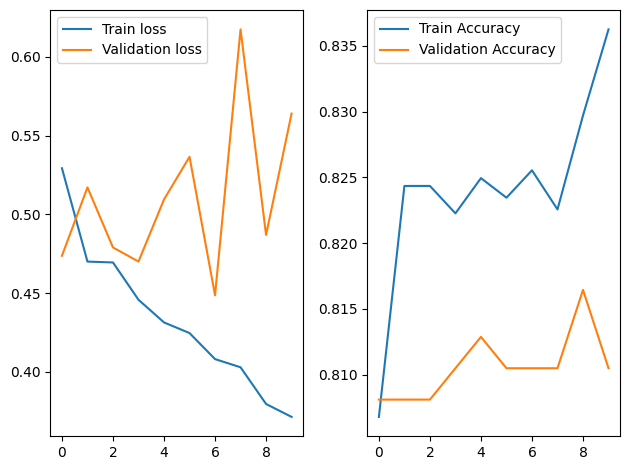

In [ ]:
plt.subplot(1,2,1)
plt.plot(history.epoch, history.history["loss"], label="Train loss")
plt.plot(history.epoch, history.history["val_loss"], label="Validation loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.epoch, history.history["accuracy"], label="Train Accuracy")
plt.plot(history.epoch, history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
loss, acc = model.evaluate(train_ds)
print(loss, acc)

105/105 [==============================] - 106s 1s/step - loss: 0.7219 - accuracy: 0.8249
0.7218535542488098 0.8249478936195374


In [ ]:
model.save('eva_geunyoung_Braille _block_share.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
import tensorflow as tf

# Load the Keras model from the H5 file
keras_model = tf.keras.models.load_model('/content/eva_geunyoung_kick_board_share.h5')

# Convert the Keras model to a TFLite model
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = converter.convert()
# Save the TFLite model to a file
tflite_model_path = '/content/eva_geunyoung_kick_board_share.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f"TFLite model saved to: {tflite_model_path}")




TFLite model saved to: /content/eva_geunyoung_kick_board_share.tflite


In [ ]:
# 기존 코드
...
model.save('eva_geunyoung_Braille_block_share.h5')

# 추가할 코드
from tensorflow.keras.models import load_model
import tensorflow as tf

# 저장된 모델 불러오기
model_path = '/content/eva_geunyoung_Braille_block_share.h5'
model = load_model(model_path)

# TensorFlow Lite 변환기 생성
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# 모델 최적화 옵션 설정 (선택 사항)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# 모델 변환
tflite_model = converter.convert()

# TensorFlow Lite 모델 저장
tflite_model_path = '/content/eva_geunyoung_Braille_block_share.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f'TensorFlow Lite 모델이 {tflite_model_path}에 저장되었습니다.')

TensorFlow Lite 모델이 /content/eva_geunyoung_Braille_block_share.tflite에 저장되었습니다.


In [ ]:
import numpy as np
import tensorflow as tf

# 이미지 경로 지정
image_path = '/content/eva.jpeg'

# 이미지 로드 및 전처리
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # 이미지 픽셀 값을 0-1 범위로 정규화

# TensorFlow Lite 모델 로드
tflite_model_path = '/content/eva_geunyoung_Braille_block_share.tflite'
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

# 입력 및 출력 텐서 가져오기
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# 이미지 분류 예측
interpreter.set_tensor(input_details[0]['index'], img_array)
interpreter.invoke()
predictions = interpreter.get_tensor(output_details[0]['index'])

# 분류 결과 출력
class_index = np.argmax(predictions[0])
num_classes = predictions.shape[1]
class_names = [str(i) for i in range(num_classes)]
predicted_class = class_names[class_index]
confidence = predictions[0][class_index] * 100
print(f'The image is classified as class "{predicted_class}" with {confidence:.2f}% confidence.')

FileNotFoundError: [Errno 2] No such file or directory: '/content/eva.jpeg'

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# 저장된 모델 불러오기
model_path = '/content/eva_geunyoung_Braille _block_share.h5'
loaded_model = load_model(model_path)

# 이미지 경로 지정
image_path = '/content/eva.jpeg'

# 이미지 로드 및 전처리
img = image.load_img(image_path, target_size=(224, 224))  # 모델에 맞는 입력 크기로 조정
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # 이미지 픽셀 값을 0-1 범위로 정규화

# 이미지 분류 예측
predictions = loaded_model.predict(img_array)
class_index = np.argmax(predictions[0])

# 분류 결과 출력
num_classes = loaded_model.output_shape[-1]
class_names = [str(i) for i in range(num_classes)]
predicted_class = class_names[class_index]
confidence = predictions[0][class_index] * 100
print(f'The image is classified as class "{predicted_class}" with {confidence:.2f}% confidence.')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install tflite-support-nightly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 23.4 MB/s eta 0:00:00


In [ ]:

!pip install tflite-support
!pip show tflite-support

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 9.2 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow==2.15.0
!pip install tf-keras==2.15.0
!pip install --upgrade tflite-support

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.2 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16.1


In [ ]:
import tensorflow as tf
import tensorflow as tf
print(tf.__version__)
!pip uninstall -y tensorflow
!pip install tensorflow
!pip install --upgrade tflite-support
from tflite_support import metadata as _metadata
from tflite_support import metadata_schema_py_generated as _metadata_fb

# TensorFlow Lite 모델 파일 경로
model_path = '/content/eva_geunyoung_Braille_block_share.tflite'

# 모델 메타데이터 생성
model_metadata = _metadata_fb.ModelMetadataT()
model_metadata.name = "Braille Block Detection Model"
model_metadata.description = "This model detects Braille blocks in images."
model_metadata.version = "1.0"
model_metadata.author = "Your Name"
model_metadata.license = "Apache License. Version 2.0 http://www.apache.org/licenses/LICENSE-2.0."

# 입력 텐서 메타데이터 생성
input_metadata = _metadata_fb.TensorMetadataT()
input_metadata.name = "input_image"
input_metadata.description = "Input image tensor"
input_metadata.content = _metadata_fb.ContentT()
input_metadata.content.contentProperties = _metadata_fb.ImagePropertiesT()
input_metadata.content.contentProperties.colorSpace = _metadata_fb.ColorSpaceType.RGB
input_metadata.content.contentPropertiesType = _metadata_fb.ContentProperties.ImageProperties

# 출력 텐서 메타데이터 생성
output_metadata = _metadata_fb.TensorMetadataT()
output_metadata.name = "detection_result"
output_metadata.description = "Braille block detection result"
output_metadata.content = _metadata_fb.ContentT()
output_metadata.content.contentPropertiesType = _metadata_fb.ContentProperties.BoundingBoxProperties
output_metadata.content.range = _metadata_fb.ValueRangeT()
output_metadata.content.range.min = 0.0
output_metadata.content.range.max = 1.0

# 서브그래프에 입력/출력 메타데이터 할당
subgraph = _metadata_fb.SubGraphMetadataT()
subgraph.inputTensorMetadata = [input_metadata]
subgraph.outputTensorMetadata = [output_metadata]
model_metadata.subgraphMetadata = [subgraph]

# 메타데이터를 플랫버퍼로 변환
b = flatbuffers.Builder(0)
b.Finish(
    model_metadata.Pack(b),
    _metadata.MetadataPopulator.METADATA_FILE_IDENTIFIER
)
metadata_buf = b.Output()

# 메타데이터를 TensorFlow Lite 모델에 추가
populator = _metadata.MetadataPopulator.with_model_file(model_path)
populator.load_metadata_buffer(metadata_buf)
populator.populate()

2.16.1
Found existing installation: tensorflow 2.16.1
Uninstalling tensorflow-2.16.1:
  Successfully uninstalled tensorflow-2.16.1
  Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (589.8 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.1 which is incompatible.


ImportError: generic_type: cannot initialize type "StatusCode": an object with that name is already defined